# IL027 Interdisciplinary Computer Modelling

## Lecture 9 (Part 1) - Artificial Neural Networks

### Berk Onat 
#### Warwick Predictive Modelling Centre, School of Engineering
##### Email: B.Onat@warwick.ac.uk

# <hr><center>Artificial Neural Networks (ANN)</center><hr>

#### This lecture covers the following topics:
- **Linear Regression**
- **Artificial Neural Networks**
  - Exercise 1: ANNs for regression using Boston Housing Data
  - Exercise 2: Classification of Hand-written Digits using MNIST data
- **Reinforcement Learning (in Part 2)**
  - Build an AI based on ANN to play with a ball.
  - Exercise 3: Train AI to play with a ball

### What is Artificial Intelligence?

Artificial Intelligence is the concept of building machines that demonstrate intelligence as colser to human intelligence where they can mimic **cognitive functions of humans** such as **learning** and **problem solving**. AI as any intelligent device, can **learn taking actions in an environment** to maximize its chance **to achieve a goal**. (Adapted from wikipedia)

### What is Machine Learning?
"<em><b>Machine learning</b></em> is the practice of using algorithms to <b>parse data, learn from it</b>, and then make <b>predictions about the output of interest</b>. So rather than hand-coding software routines with a specific set of instructions to accomplish a particular task, the machine is <b>“trained”</b> using large amounts of data and algorithms that give it the ability to learn how to perform the task." (Reference: nvidia.com)


### What is the difference between <span style="color:red">Artificial Intelligence</span>, <span style="color:blue">Machine Learning</span>, <span style="color:green">Deep Learning</span>, and <span style="color:orange">Data Science</span>?
<img src="imgL9/ai-machinelearning.png" style="center"/>

## Linear Function Fitting

The simplest model for regression is the one in which the target value is expected to be a `linear combination of the input variables`

$$y(w,x) = w_0 + w_1x_1 + w_2x_2 + ... +w_Nx_N $$

Where $w = (w_0,w_1,...,w_N)$ as the `weights` of the model and $X = (x_0,x_1,x_2,...,x_N)^T$ input values where $x_0$ is 1. Here the input values can be accounted a vector and $w$ set has N+1 values. We can simplify the notation using a sum as

$$y(w,x) = \sum_{j=0}^{N} w_jx_j = w^TX$$

In linear closed-solutions, we can find the `weights` , $w$ by solving

$$w^TX-y = 0$$

Multiply $X$ from left and $X^T$ from right, we get

$$ X(w^TX)X^T - XyX^T = 0 $$

and take the transpose of both sides and multiply with $(X^T)^{-1}$ from right

$$ wX^TX = Xy^T =X^Ty$$

and rearrange,

$$ w = (X^TX)^{-1}X^Ty$$

#### Let's generate a sample data to test `Linear Regression`. Here we take random $X$ values and use  

$$ true\_fun(X) = 1.5X + 2$$ 

as the function to produce true $y$ values with some random additions.

In [1]:
n_samples=100 # number of samples in the dataset

true_fun(X) = 1.5 * X + 2.0

x = sort(rand(n_samples))
y = true_fun.(x) .+ randn(n_samples) .* 0.1;

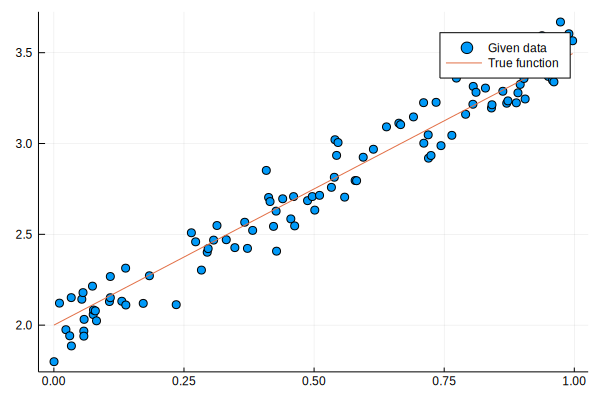

In [2]:
using Plots
scatter(x,y, label="Given data")
plot!(x,true_fun.(x), label="True function")

In [3]:
linreg(x, y) = hcat(fill!(similar(x), 1), x) \ y
# y = ax + b
fit_func(a,b,x) = a * x + b

fit_func (generic function with 1 method)

In [4]:
(b, a) = linreg(x,y)

2-element Array{Float64,1}:
 1.9638213610717707
 1.5522473923069613

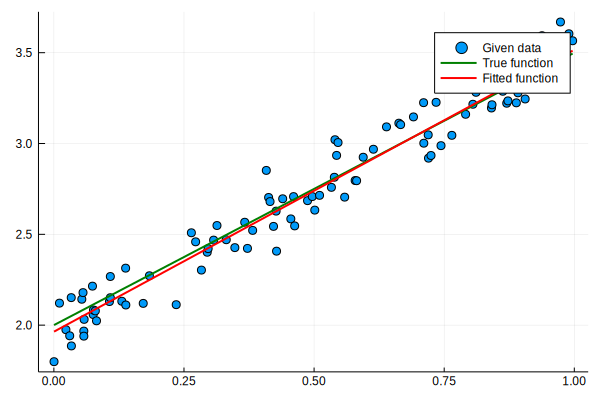

In [5]:
scatter(x,y, label="Given data")
plot!(x,true_fun.(x), color="green", lw=2, label="True function")
plot!(x,fit_func.(a,b,x), color="red", lw=2, label="Fitted function")

## Linear Regression with Basis Functions
Note that the model is as simple as a linear function of only the input values here. To generelise the model we can also consider that $y$ can be represented with `linear combinations of linear or non-linear functions`. 

$$y(w,x) = w_0 + \sum_{j=1}^{N-1} w_j\phi_j(x)$$

where $\phi(x)$ is called as `basis function`. We can rewrite this in the following form:

$$y(w,x) = \sum_{j=0}^{N-1} w_j\phi_j(x)$$

and also represent it with an inner product of $w$ and $\phi(x)$ vectors as

$$y(w,x) = w^T\phi(x)$$

## Fitting a linear model

We would like to find the optimum `weights` for our linear model that produce `y` values. 
If $y$ is linearly dependent to $x$ the solution will be exactly find and the equation above will hold the equality. However, if we do not know whether $y(x)$ is a linear function, we can define the problem to be

$$\hat y = y(w,x) + E(w)$$

where $\hat y$ is the corresponding target values for each data point $x$ and $E$ is the `error function` for the model with `weights` and defined as sum-of-squares with

$$E(w) = {1 \over 2}\sum_{n=1}^{N}[y(x_n,w) - \hat y_n]^2$$

Minimizing $E(w)$, we can find the optimum `weights` and fit our model. Minimizing a sum-of-squares error function can be considered as the `least squares` approach. 

## Linear Regression with Least Squares

For non-linear proglems in `least squares` approach, we can minimize the same `error function` 

$$ \min_{w}(E(w))$$

or we can minimize mean-squared-error (MSE) definiton as

$$ \min_{w}(2E(w)/N)$$


starting an initial guess for $w$. Generally, we want weights to be small therefore we will select a random distribution around zero for initial guess of `weights`.

$$ w^{k+1}_j = w^k_j + \Delta w^k_j$$



## Auto Gradient of Functions with <span style="color:green">Zygote</span> 
Zygote is a package for source-to-source automatic differentiation (AD) in Julia

<img src="imgL9/zygote.png" style="center" width=40%/>
 
For documentation of Zygote, please check <a>https://fluxml.ai/Zygote.jl</a>

To access the code distribution see <a>https://github.com/FluxML/Zygote.jl</a>

In [6]:
using Zygote

Let's try a simple example function to find the derivatives.

In [7]:
f(x) = cos.(x)

f (generic function with 1 method)

In [8]:
gradient(x -> f(x), pi/2.0)

(-1.0,)

In [9]:
g(x) = gradient(x -> f(x), x)

g (generic function with 1 method)

In [10]:
g(pi/2.0)

(-1.0,)

In [11]:
-sin(pi/2.0)

-1.0

Now we can define our `linear regression` model using `gradient`.

In [12]:
# Our linear regression model
predict_y(w, x) = x * w'

# error function
error_function(w, x, y) = sum(abs2.(y - predict_y(w, x))) / size(x, 1)

function linear_regression(w, x, y; lr=1.0E-2, N=1000)
    for i = 1:N
        dw = gradient(w -> error_function(w,x,y), w)[1]
        w = w - (lr * dw)
    end
    return w
end

linear_regression (generic function with 1 method)

In [13]:
#Adding a column of ones for b (constant) in y=a*x+b 
x_input = hcat(x, ones(size(x,1))) 

# Initialise random weights within (-1,1] range 
w = rand(1, size(x, 2)+1) .* 2.0 .- 1.0

#Fit linear regression model and print final error
w = linear_regression(w, x_input, y, lr=1.0E-1, N=100000)     
println(error_function(w, x_input, y)) 

0.010504176189933927


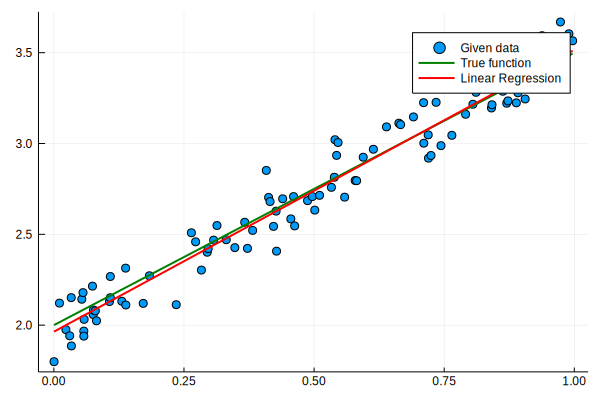

In [14]:
scatter(x,y, label="Given data")
plot!(x,true_fun.(x), color="green", lw=2, label="True function")
plot!(x,predict_y(w, x_input), color="red", lw=2, label="Linear Regression")

<span style="color:red">Flux</span> is a Machine Learning (ML) library in Julia that provides a fast differentiable programming framework.

<img src="imgL9/flux.png" style="center" width=40%/>

See <a>https://github.com/FluxML/Flux.jl</a> to access the code distribution.

Please check <a>https://fluxml.ai/Flux.jl</a> for Flux documentation.

In [15]:
using Flux.Tracker: track, @grad, data, gradient
using Flux, Statistics
using Flux: onehotbatch, onecold, crossentropy, throttle
using Base.Iterators: repeated
import Images

# Artificial Neural Networks

## Perceptrons

Artificial Neural Networks (ANN) or in short Neural Networks (NN) are inspired from actual <b>neurons</b> in nerve system. While a <b>neuron</b> can be activated with an input pulse signal, it responds non-linearly to this signal and produces an output signal or in other words value. 

In NNs, this idea is simplified to additive value description of inputs with a non-linear responce function ,which we call <b>activation function</b>. The building block of NNs is called <b>perceptrons</b> as show below.

<center><img src="imgL9/perceptron.png" style="center" width=30%/></center>

Mathematically, a perceptron is defined with 
$$ y_{w,b}(x) = f(\sum_i^N x_iw_i + b_i)$$
In the example above, number of values in input vector $x$ is $N=3$ and $w$ values are the <b>weight</b> parameters with $b$ as the <b>bias weight</b> parameter. An optimization can be applied on <b>weights</b> and <b>bias weights</b> of the network according to the input vector and output target value(s). For simplicity, we can also call each perceptron connection (orange circle in Figure) a <b>node</b> as in graphs.

## Activation Functions
In the above equation, $f(x)$ function is the <b>activation function</b> and in general it is taken as the $tanh(x)$ function or a similar non-linear/switching function such as sigmoid function (Logistic) or Rectified Linear Unit (ReLU).

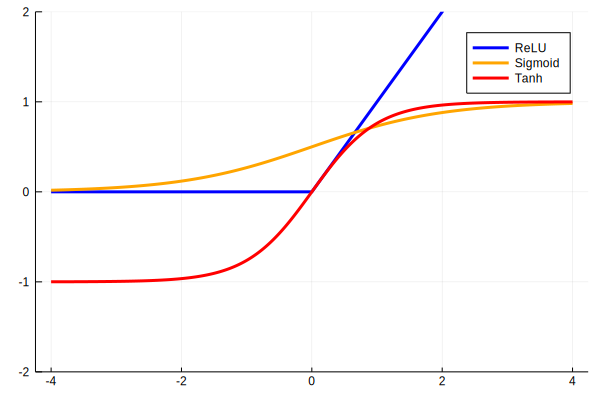

In [16]:
x = -4.0:0.01:4.0
plot(x,relu.(x), color="blue", linewidth=3, label="ReLU")
plot!(x,σ.(x), color="orange", linewidth=3, label="Sigmoid")
plot!(x,tanh.(x), color="red", linewidth=3, label="Tanh")
ylims!((-2, 2))

## Multi-Layer Perceptrons (MLP) aka Neural Networks

Using the building block perceptron, we can connect many nodes in multiple layers. When we connect perceptrons with many layers, this will be called Multi-Layer Perceptrons (MLPs) and in general Neural Networks are built on them. Examine the example below in figure.

<center><img src="imgL9/nn.png" style="center" width=30%/></center>

Here, we build a neural network with <b>4</b> layers. The first layer at the left hand side is the <b>input layer</b> (blue spheres, nodes) and is the $x$ input vector of the model. At far right hand side, we have <b>output layer</b> (red spheres, nodes) where the model produces $y$ output values ,which are also the predictions of the model. In between these layers, there are two <b>hidden layers</b> that are full-connected to each other.

In equation form, the above network can be written as

$$ y_{w,b}(x) = f(\sum_i^N w_if(\sum_j^M x_jw_j + b_j) + b_i)$$

or in recursion equation form, this will be

$$ y_{w,b}^{k+1}(x) = f(\sum_i^{N_k} w_iy_i^{k} + b_i^{k})$$

where $k=0,...,2$ and $y^0=x$ and $y^2=y$.

While the input layer is also full-connected to each node of the hidden layer, the output layer is only connected to the outputs of each last hidden layer. This is because of the red arrow shows the connections hence the <b>weights</b> of each input, while the last output is just a sum over the output values of each hidden node. 


# Gradient Descent optimization
In order to minimize/optimize $E(w)$ <b>the loss (objective) function</b>, we consider the gradient descent (GD) with:

$$ w_{k+1}=w_{k}-\epsilon \nabla E(w_k)$$

In each iteration of the gradient descent step, the optimization is carried-out on different sets of data hence the `weights` of the model is updated with respect to the selected random data set. Hence randomly selecting the $x_i$ values in the Gradient Descent is called Stochastic Gradient Descent (SGD).

## Backpropagation Algorithm.
To optimize the `weights` of ANN, we use `Backpropagation Algorithm` to back-propagate error.
Than, we can find the derivative of `loss function` with respect to the weigths.

Note, the recurrence function of ANN is defined with

$$ y_{w,b}^{k+1}(x) = f(\sum_i^{N_k} w_iy_i^{k} + b_i^{k})$$

Than, we can write derivative of $E$ with respect to `weights`
$${{\partial E}\over{\partial w^k}} = {{\partial E}\over{\partial y^k}}{{\partial y^k}\over{\partial w^k}}$$

and `baises`

$${{\partial E}\over{\partial b^k}} = {{\partial E}\over{\partial y^k}}{{\partial y^k}\over{\partial b^k}}$$


### Neural Networks for Regression using Boston Housing Data (boston.csv)
This is a copy of UCI ML housing dataset. [https://archive.ics.uci.edu/ml/machine-learning-databases/housing/](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/)

In [17]:
import DataFrames

In [18]:
boston_df = DataFrames.readtable("boston.csv")
first(boston_df,6)

┌ Warning: readtable is deprecated, use CSV.read from the CSV package instead
│   caller = top-level scope at In[18]:1
└ @ Core In[18]:1


,Crim,Zn,Indus,Chas,NOx,Rm,Age,Dis,Rad
,Float64⍰,Float64⍰,Float64⍰,Int64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3
6,0.02985,0.0,2.18,0,0.458,6.43,58.7,6.0622,3


In [19]:
boston = convert(Matrix,boston_df);
boston_input = boston[:,1:13];
boston_target = boston[:,14:14];

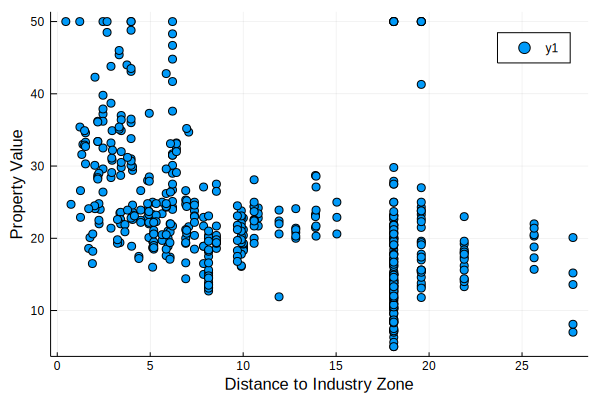

In [54]:
scatter(boston_input[:,3],boston_target, 
    xlabel="Distance to Industry Zone",
    ylabel="Property Value")

### In Flux, a model can be a dense matrix with `Dense(m,n)`

In [21]:
model1 = Dense(13, 1)

Dense(13, 1)

### or a chain of functions defined in `Chain(...)`

In [22]:
model2 = Chain(
    Dense(13, 1),
    x -> x.^2
    )

Chain(Dense(13, 1), #10)

In [23]:
model = Chain(
    Dense(13, 1)
    )

Chain(Dense(13, 1))

### Before using the given data, we can normalise it.

In [24]:
# Normalise the data
x_input = (boston_input .- mean(boston_input, dims = 2)) ./ std(boston_input, dims = 2);

### In Flux, an ANN model definition is simple as the following:

In [25]:
# Model is define here
model = Chain(
    Dense(13, 1)
    )

# Define loss (error) function
loss(x, y) = mean((model(x) .- y).^2)

# Setting multiple instance of data for optimization
dataset = repeated((x_input', boston_target'), 1000)

# This function is a callback function to print loss values
evalcb = () -> @show(loss(x_input', boston_target'))

# We set ADAM optimization method
opt = ADAM()

ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}())

### Now, we can train our model using the defined functions and parameters.

Here we train the model 100 steps or `epochs` as it is defined in machine learning community.

In [26]:
for i=1:100
    Flux.train!(loss, params(model), dataset, opt, cb = throttle(evalcb, 1000))
end
@show loss(x_input', boston_target')

loss(x_input', boston_target') = 495.54748594969595 (tracked)
loss(x_input', boston_target') = 220.15449081751527 (tracked)
loss(x_input', boston_target') = 109.17559044738648 (tracked)
loss(x_input', boston_target') = 79.18568223166334 (tracked)
loss(x_input', boston_target') = 73.81259674015047 (tracked)
loss(x_input', boston_target') = 70.93630115506753 (tracked)
loss(x_input', boston_target') = 67.96361478536981 (tracked)
loss(x_input', boston_target') = 65.34318798034644 (tracked)
loss(x_input', boston_target') = 63.479472797405386 (tracked)
loss(x_input', boston_target') = 62.3395822113698 (tracked)
loss(x_input', boston_target') = 61.523862860323746 (tracked)
loss(x_input', boston_target') = 60.71393827243798 (tracked)
loss(x_input', boston_target') = 59.843427762066774 (tracked)
loss(x_input', boston_target') = 58.93627699252051 (tracked)
loss(x_input', boston_target') = 58.02507511597841 (tracked)
loss(x_input', boston_target') = 57.13581488910935 (tracked)
loss(x_input', bost

30.327958340756247 (tracked)

### We can check ANN predictions by comparing predicted data with target values.

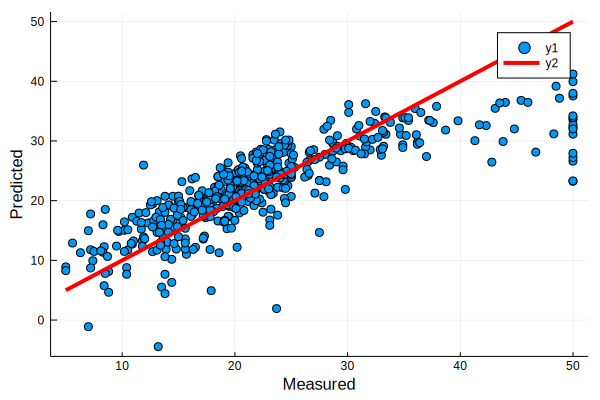

In [27]:
predicted = Tracker.data(model(x_input'))';
scatter(boston_target, predicted)
plot!([minimum(boston_target), maximum(boston_target)], 
    [minimum(boston_target), maximum(boston_target)], 
    color="red", lw=4, xlabel="Measured", ylabel="Predicted")

### Neural Network as a Classification Model

We will use MNIST Hand-Written Digits dataset to make predictions.


In [28]:
using MLDatasets
using Colors
using Images: channelview, display, colorview
#Gray = Colors.Gray{Colors.N0f8}

### We will download MNIST Hand-written Digits dataset below.
If the download process asks you whether you would like to continue with the download, type `y` or `yes` to text window and `enter`.

In [29]:
train_x, train_y = MNIST.traindata(dir="./");
test_x,  test_y  = MNIST.testdata(dir="./");

### To visualise the dataset, we will do some convertions and reshaping of arrays below.

In [30]:
# Function to convert the image to Float32 Arrays
get_images(X) = Float32.(channelview(X))
getarray(X) = Float32.(permutedims(channelview(X), (1, 2, 3)))

getarray (generic function with 1 method)

### To visualise the dataset, we will do some convertions and reshaping of arrays below.

In [31]:
size(train_x)

(28, 28, 60000)

In [32]:
imgs = get_images(train_x);

In [33]:
size(imgs)

(28, 28, 60000)

In [34]:
xx = getarray(train_x);

### Now, we are ready to visualise the images.

,,,,

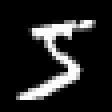
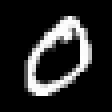
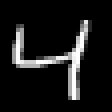
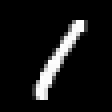
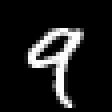

In [35]:
[Gray.(permutedims(imgs[:,:,i], [2,1])) for i in collect(1:5)]

### We can also check the corresponding `target` values, which are the integer values of digits.

In [36]:
train_y[collect(1:5)]'

1×5 LinearAlgebra.Adjoint{Int64,Array{Int64,1}}:
 5  0  4  1  9

## Maximum Log Likelyhood

If we assume that $\hat y$ target values has a Gaussian distribution with the $x$-dependence, than the maximum log likelihood function can be written with

$$ln P(t|w,\beta) = {N\over2} ln(\beta) - {N\over2} ln(2\pi) -\beta E(w)$$

Recall that the `error function` $E(w)$ is defined with

$$E(w) = {1 \over 2}\sum_{n=1}^{N}[y(x_n,w) - \hat y_n]^2$$

If we maximize the logarithm of likelihood, it is equivalent to minimizinf sum-of-squares error function.
Moreover, minimizing negative logarithm of likelihood is equivalent to maximizin log likelihood.

### Now, we will build our Neural Network with defining loss function (nll, negative log likelyhood) and optimize it.

### To train all the given training data, we need to stack the images into one array

In [37]:
# Stack images into one large batch
X = reshape(xx,(:,size(xx)[3]));
size(X)

(784, 60000)

In [38]:
size(train_y)

(60000,)

### In this model, we will use `classification` rather than `regression`. To do so, we need to identofy the target values positions in the output arrays.

The ANN model can get either a `vector` or a `matrix`. Here, we will supply an input with images, matrices.
The output of ANN will hold not the digit numbers but the positions within a vector with size 10. 

Each output vector of ANN will include values between 0 and 1. The position of the highest value in this vector is the digit encoding. 

To succesfully encode all the target values and the output values of ANN model, we will use so called `onehot` and `onecold` encodings.


### In `onehot` encoding, only the values that are given in the function will be shown with `1` and the rest of the values will be coded with `0`.

In [39]:
# One-hot-encode the labels
Y = onehotbatch(train_y, 0:9)

10×60000 Flux.OneHotMatrix{Array{Flux.OneHotVector,1}}:
 0  1  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  1  0  1  0  0  0  0     0  0  0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0  0  0  0     0  0  0  1  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  0  0  1  0  1     0  0  0  0  0  0  0  0  1  0  0  0
 0  0  1  0  0  0  0  0  0  1  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0  0  1  0  …  0  0  0  0  0  1  0  0  0  1  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  1  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  1  0  0  0  0  0  1  0  0  0  1
 0  0  0  0  1  0  0  0  0  0  0  0  0     0  0  1  0  1  0  0  0  0  0  0  0

### To reverse this encoding, in other words decoding, we use `onecold` function.

In [40]:
onecold(Y)

60000-element Array{Int64,1}:
  6
  1
  5
  2
 10
  3
  2
  4
  2
  5
  4
  6
  4
  ⋮
  8
  9
 10
  3
 10
  6
  2
  9
  4
  6
  7
  9

## Now, we are ready to build our ANN model and setup training functions and parameters.

In [41]:
model = Chain(
    Dense(28^2, 4, relu),
    Dense(4, 10),
    softmax)

Chain(Dense(784, 4, relu), Dense(4, 10), softmax)

In [42]:
## negative log likelihood function
loss(x, y) = crossentropy(model(x), y)

accuracy(x, y) = mean(onecold(model(x)) .== onecold(y))

dataset = repeated((X, Y), 200)
evalcb = () -> @show(loss(X, Y))
opt = ADAM()

ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}())

Accuracy is defined with the mean number of equal predictions to the actual values. In short, 

$$ accuracy(y,\hat y) = \left(\sum_i^N \delta(\hat y_i - y_i)\right) / N$$

here, `N` is the number of samples. We can calculate the accuracy with `score`.

In [43]:
accuracy(x, y) = mean(onecold(model(x)) .== onecold(y))

accuracy (generic function with 1 method)

### Let's train our NN with one hidden layer first.

In [44]:
Flux.train!(loss, params(model), dataset, opt, cb = throttle(evalcb, 10))
@show accuracy(X, Y)

loss(X, Y) = 2.3139937f0 (tracked)
loss(X, Y) = 2.0831664f0 (tracked)
loss(X, Y) = 1.9214393f0 (tracked)
loss(X, Y) = 1.8066239f0 (tracked)
loss(X, Y) = 1.7004468f0 (tracked)
loss(X, Y) = 1.6090511f0 (tracked)
accuracy(X, Y) = 0.4296833333333333


0.4296833333333333

### To test our model's accuracy, we can use the test dataset from MNIST download.

In [45]:
# Test set accuracy
test_imgs = get_images(test_x);
txx = getarray(test_x);
tX = reshape(txx,(:,size(txx)[3]));
tY = onehotbatch(test_y, 0:9);

@show accuracy(tX, tY)

accuracy(tX, tY) = 0.4349


0.4349

In [46]:
size(test_imgs)

(28, 28, 10000)

### Let's check if we can actually see how ANN can predict what is in the images.

### Here, we select the images from 1 (first image) to 5 for our test. 
If you would like to test other images either change the range in `collect` or assign a list to `selected`. For example, `selected = [10,12,14]`.

In [47]:
selected = collect(1:5);

In [48]:
test_y[selected]

5-element Array{Int64,1}:
 7
 2
 1
 0
 4

,,,,

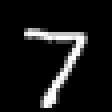
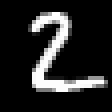
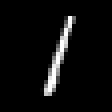
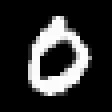
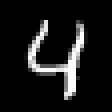

In [49]:
[Gray.(permutedims(test_imgs[:,:,i], [2,1])) for i in selected]

In [50]:
x_input = tX[:,selected];
y_pred = model(x_input)

Tracked 10×5 Array{Float32,2}:
 0.266107     0.0995462  0.0699655  0.329367    0.0679717
 0.0243932    0.0750318  0.524406   0.0871979   0.0769166
 0.0160015    0.124732   0.0313239  0.026054    0.108121 
 0.128647     0.073603   0.0342923  0.0515209   0.0922331
 0.000537065  0.109716   0.0716988  0.00235019  0.137476 
 0.0763104    0.0772091  0.0283748  0.0370726   0.092673 
 0.00131949   0.123599   0.014025   0.00263995  0.133094 
 0.469921     0.0773411  0.0616371  0.412625    0.0553075
 0.011017     0.120845   0.133038   0.0430166   0.0991453
 0.00574626   0.118377   0.0312389  0.00815519  0.137062 

In [51]:
onecold(y_pred).-1

5-element Array{Int64,1}:
 7
 2
 1
 7
 4

In [52]:
onecold(tY[:,selected]).-1

5-element Array{Int64,1}:
 7
 2
 1
 0
 4

### Exercise 2: Change the number of nodes at hidden layers. 
### Fill `?` values with appropriate integers below (Hint: select values smaller than 40)

In [53]:
model = Chain(
    Dense(28^2, ?, relu),
    Dense(?, 10),
    softmax)

LoadError: syntax: invalid identifier name "?"

### Try fitting this new ANN model by writing your code below.

In [ ]:
### Your code is here

### Since we trained our new ANN, let's try it on predictions of Digits !

### Do outputs match with the target digits?

### Why do you think the fitting is much better when we select more hidden layers or nodes?

## Deep Networks and Deep Learning

Addition of multiple layers extend the flexibility of the neural networks to fit complex problems. Multiple hidden layers extend the capability of non-linear representation of the complex problem. Using this idea and pre-processing layers such as convolution of input values over non-dependent spacial dimensions and gradient back-propagation, deep neural networks could be constructed. These deep neural networks is shown that they can be used in image recognition very efficiently and very accurately. <b>Deep Learning</b> as a sub field of ML focus on these deep networks and their possible applications. 

For further reading about Deep Learning, here are some references: [Deep Learning](http://ufldl.stanford.edu/tutorial/supervised/ConvolutionalNeuralNetwork/), [Deep Convolutional Networks](http://deeplearning.net/tutorial/lenet.html#lenet)

### Study Topics:
1. Use data from `Student Performance in Exams` in [Kaggle](https://www.kaggle.com/spscientist/students-performance-in-exams) and cluster the data using `Classification Models` according to different features. You may answer whether the following has any effect on the exam scores: the student had a lunch before the exam, took exam preperation courses or their parental level of education.
2. How about predicting properties of Pokemon monsters? [The Complete Pokemon Dataset](https://www.kaggle.com/rounakbanik/pokemon) 

### For further reading on this topic:

1. **Autoencoder neural networks** in unsupervised learning. [Tutorial on Autoencoders at Stanford University](http://ufldl.stanford.edu/tutorial/unsupervised/Autoencoders/)
2. **Self-Orginized Maps (SOM)** for clustering data in unsupervised learning. Also check the Julia code here that I arranged for SOM [SOM Julia code](https://github.com/berkonat/julia-ml-examples)